# Preparation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3 * x**2 - 4 * x + 5


print(f(3))

xs = np.arange(-5.0, 5.0, 0.5)
plt.plot(xs, f(xs))
plt.show()

In [ ]:
# df/dx = lim_h->0 (f(x+h) - f(x) / h)
h = 0.00001

a, b, c = 2.0, -3.0, 15.0
d1 = a * b + c
c += h
d2 = a * b + c
print(f"d1: {d1}")
print(f"d2: {d2}")
print(f"slope: {(d2-d1)/h}")

# Value Class

## Visualization

In [1]:
from graphviz import Digraph


def build_graph(root):
    nodes, edges = set(), set()

    def dfs(n):
        if n not in nodes:
            nodes.add(n)
            for child in n._prev:
                edges.add((child, n))
                dfs(child)

    dfs(root)
    return nodes, edges


def draw_dot(root):
    nodes, edges = build_graph(root)

    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(tail_name=uid + n._op, head_name=uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

## Simple Example

In [ ]:
from Values import Value

a = Value(3.0, label="a")
b = Value(2.0, label="b")
c = a * b
c.label = "c"

d = Value(1.0, label="d")
e = c + d
e.label = "e"
f = Value(-2.0, label="f")
L = e * f
L.label = "L"

In [ ]:
draw_dot(L)

In [ ]:
# dL/dL = 1
L.grad = 1.0

# dL/de = f, dL/df = e
e.grad = f.data
f.grad = e.data

# dL/dc = (dL/de) * (de/dc)
c.grad = e.grad
d.grad = e.grad

# dL/da = (dL/dc) * (dc/da)
a.grad = c.grad * b.data
b.grad = c.grad * a.data

In [ ]:
draw_dot(L)

## Neuron

In [ ]:
from Values import Value

# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "o"

In [ ]:
# Manual Backpropagation
o.grad = 1.0
n.grad = 1 - o.data**2
b.grad = n.grad
x1w1x2w2.grad = n.grad

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
draw_dot(o)

In [ ]:
# Semi-manual Backpropagation
o.grad = 1.0
o._backward()
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

In [ ]:
# Auto Backpropagation
o.backward()

In [ ]:
# Another example where each node is used more than once
x = Value(3.0, label="x")
y = Value(2.0, label="y")
z1 = x + y
z2 = x * y
z = z1 + z2

z.backward()
draw_dot(z)

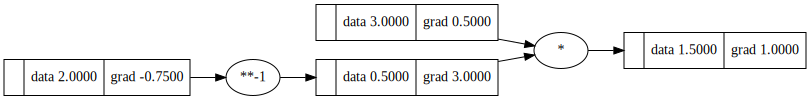

In [2]:
# Division
from Values import Value

x = Value(3.0) / Value(2.0)
x.backward()
draw_dot(x)

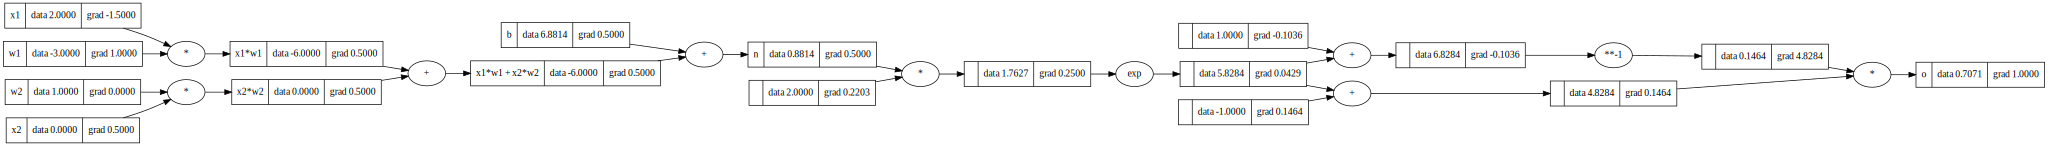

In [3]:
# Break down Tanh
from Values import Value

# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
e = (2 * n).exp()
o = (e - 1) / (e + 1)
o.label = "o"

o.backward()
draw_dot(o)